# Scaling

In [46]:
if True:
    detrend = LinearRegression().fit(np.array(list(hourly_counts.index)).reshape(-1, 1), np.log(hourly_counts.rides))
    detrend.coef_

    detrend.intercept_ = 0.0

    hourly_counts['rides_detrend'] = hourly_counts.rides / np.exp(
        detrend.predict(np.array(list(hourly_counts.index)).reshape(-1, 1)))

In [37]:
year_means = hourly_counts.groupby('yr').rides.mean()
ratio = year_means[1] / year_means[0]
print("Scaling test set by", ratio)

Scaling test set by 1.6319570412428936


In [50]:
hourly_counts['rides_divyrmean'] = np.where(hourly_counts.yr == 0, hourly_counts.rides, hourly_counts.rides / ratio)
hourly_counts.groupby('yr').rides.mean()

yr
0    143.794448
1    234.666361
Name: rides, dtype: float64

In [44]:
hourly_counts['date'] = pd.to_datetime(hourly_counts['date'])

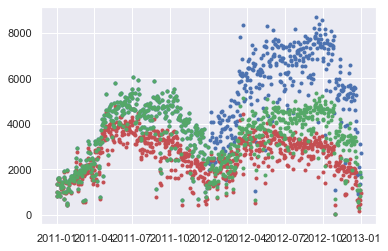

In [57]:
plt.plot(hourly_counts.groupby('date').rides.sum(), 'b.')

plt.plot(hourly_counts.groupby('date').rides_detrend.sum(), 'r.')

plt.plot(hourly_counts.groupby('date').rides_divyrmean.sum(), 'g.')

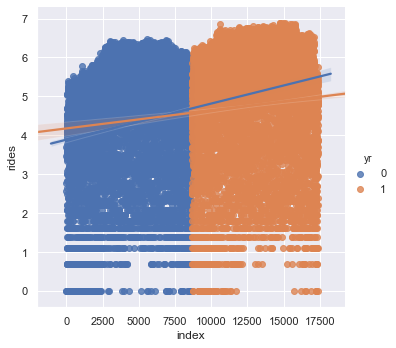

In [60]:
sns.lmplot(x='index', y='rides', data=hourly_counts.assign(rides=np.log(hourly_counts.rides)).reset_index(), hue="yr")